In [41]:
from sklearn.datasets import fetch_california_housing
import pandas as pd    
import numpy as np

data = fetch_california_housing(as_frame=True)
print(data)
print('-'*66)
df = data.frame
print(df.head())  
df = df[df['MedHouseVal'] < 5]


{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

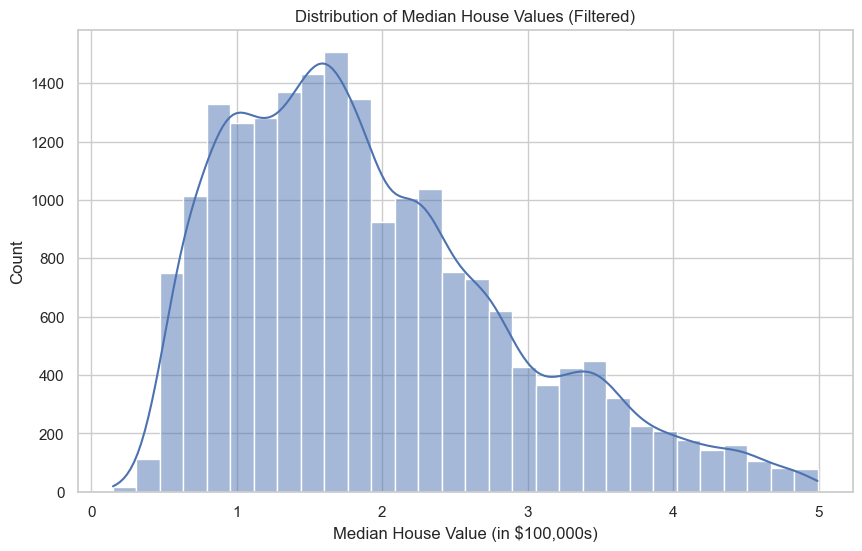

In [42]:
# Let's check the new distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Values (Filtered)')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Count')
plt.show()

In [43]:
df.corr()['MedInc'].sort_values()

HouseAge      -0.195542
Latitude      -0.078135
AveBedrms     -0.065418
Longitude     -0.008992
AveOccup       0.026172
Population     0.042576
AveRooms       0.325739
MedHouseVal    0.646719
MedInc         1.000000
Name: MedInc, dtype: float64

In [44]:
x = df.drop(['MedHouseVal', 'HouseAge', 'Latitude', 'AveBedrms', 'Longitude'], axis=1)
y = df['MedHouseVal']
print("Training data shape:", x)

print(x)


Training data shape:        MedInc  AveRooms  Population  AveOccup
0      8.3252  6.984127       322.0  2.555556
1      8.3014  6.238137      2401.0  2.109842
2      7.2574  8.288136       496.0  2.802260
3      5.6431  5.817352       558.0  2.547945
4      3.8462  6.281853       565.0  2.181467
...       ...       ...         ...       ...
20635  1.5603  5.045455       845.0  2.560606
20636  2.5568  6.114035       356.0  3.122807
20637  1.7000  5.205543      1007.0  2.325635
20638  1.8672  5.329513       741.0  2.123209
20639  2.3886  5.254717      1387.0  2.616981

[19648 rows x 4 columns]
       MedInc  AveRooms  Population  AveOccup
0      8.3252  6.984127       322.0  2.555556
1      8.3014  6.238137      2401.0  2.109842
2      7.2574  8.288136       496.0  2.802260
3      5.6431  5.817352       558.0  2.547945
4      3.8462  6.281853       565.0  2.181467
...       ...       ...         ...       ...
20635  1.5603  5.045455       845.0  2.560606
20636  2.5568  6.114035       356

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)




#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)


Training data shape: (15718, 4)
Testing data shape: (3930, 4)


In [46]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

y_pred


array([2.2934, 1.9534, 2.408 , ..., 1.2196, 1.6754, 2.7382])

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("KNN Model Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R²:   {r2:.3f}")


KNN Model Performance:
RMSE: 0.825
MAE:  0.635
R²:   0.291


In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("KNN Model Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R²:   {r2:.3f}")


KNN Model Performance:
RMSE: 0.646
MAE:  0.480
R²:   0.565
